## ㅁOne Point Tutorial III
# `Time Series`
<p style='text-align: right;'> 빅데이터 분석 중고급과정 with 관악구, KMR</p>
<p style='text-align: right;'> 2023 2nd | All rights reserved by Wooseok Song</p>

---

# 0. 목차소개

1. PSL의 datetime 모듈에 대하여
2. Time Series Data Handling
3. Period
4. Resampling
5. TimeSeries 그리기

목표 : 시계열 데이터를 다루는 데에 있어서 필요한 기본기들을 익히도록 하자

# 1. PSL의 datetime 모듈에 대하여

파이썬에는 기본라이브러리(Python Standard Library)에 날짜와 시간을 담당하는 모듈이 있다. *datetime.py*

In [33]:
from datetime import datetime
import numpy as np
import pandas as pd

## 1.1 datetime 객체의 주요 attribute

`datetime.year`

`datetime.month`

`datetime.day`

`datetime.hour`

`datetime.second`

`datetime.microsecond`

## 1.2 datetime 객체의 생성 방법

In [34]:
datetime.now()

datetime.datetime(2023, 7, 1, 16, 21, 38, 112085)

표현식에서는 second와 microsecond가 0일 경우에 표시하지 않는다.

In [35]:
datetime(2019, 8, 27)

datetime.datetime(2019, 8, 27, 0, 0)

## 1.3 datetime 객체의 산술 연산

datetime간의 - 연산

In [36]:
datetime.now() - datetime(2019, 8, 27)

datetime.timedelta(days=1404, seconds=58898, microseconds=140142)

datetime과 timedelta간의 산술 연산

In [37]:
from datetime import timedelta

In [38]:
t1 = datetime(2019, 1, 1)
t1

datetime.datetime(2019, 1, 1, 0, 0)

In [39]:
t1 + timedelta(12)

datetime.datetime(2019, 1, 13, 0, 0)

In [40]:
t1 + 2 * timedelta(12)

datetime.datetime(2019, 1, 25, 0, 0)

In [41]:
t1 - timedelta(12)

datetime.datetime(2018, 12, 20, 0, 0)

## 1.4 string, datetime, pd.timestamp 객체 간의 변환

외부에서 긁어모은 데이터를 원하는 형식으로 나타내고자 할 때 변환을 많이 한다.

### 1.4.1 str ==> datetime

문자열에서 시간에 관련한 정보가 어떻게 저장되어있는 지 포맷을 전달하면 된다.

In [42]:
datetime.strptime('2019-08-01', '%Y-%m-%d')

datetime.datetime(2019, 8, 1, 0, 0)

In [43]:
datetime.strptime('2019/08/01', '%Y/%m/%d')

datetime.datetime(2019, 8, 1, 0, 0)

In [44]:
datetime.strptime('08/01/19', '%m/%d/%y')

datetime.datetime(2019, 8, 1, 0, 0)

### 1.4.2 datetime ==> str

In [45]:
datetime(2019,8,1).strftime('%Y-%m-%d')

'2019-08-01'

In [46]:
datetime.strftime(datetime.now(), '%Y-%m-%d')

'2023-07-01'

In [47]:
datetime.strftime(datetime.now(), '%y-%m-%d')

'23-07-01'

### 1.4.3 str ==> timestamp

In [48]:
pd.to_datetime(['2019-08-01', '2019/08/02'])

ValueError: time data "2019/08/02" doesn't match format "%Y-%m-%d", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# 2. Time Series Data Handling

## 2.1 Time Series 객체를 생성하는 방법

pd.Series의 parameter **index**에 시간을 넣어주면 시계열 데이터의 필수 조건인 시간축을 만들 수 있다.

!!! index에 시간을 넣어주는 방법

> 1. datetime을 원소로 갖는 iterable한 객체
> 2. pd.DatetimeIndex 객체

In [49]:
dates = [datetime(2019,8,1), datetime(2019,8,3), datetime(2019,8,8), datetime(2019,9,11), 
         datetime(2019,10,1)]

In [50]:
ts1 = pd.Series(np.arange(5), index=dates)

In [51]:
ts1

2019-08-01    0
2019-08-03    1
2019-08-08    2
2019-09-11    3
2019-10-01    4
dtype: int32

In [52]:
ts1.index

DatetimeIndex(['2019-08-01', '2019-08-03', '2019-08-08', '2019-09-11',
               '2019-10-01'],
              dtype='datetime64[ns]', freq=None)

In [53]:
ts1 = pd.Series(np.arange(5), pd.DatetimeIndex(dates))

In [54]:
ts1

2019-08-01    0
2019-08-03    1
2019-08-08    2
2019-09-11    3
2019-10-01    4
dtype: int32

## 2.2 TimeSeries의 Index를 만드는 방법

위에서는 날짜 값을 하나하나 지정하여 Index를 만들었지만, 일반적으로 **특정한 규칙**을 통해 만드는 경우가 더 많다.

이 때, `pd.date_range`라는 함수를 사용한다.

이어진 날짜 뿐 아니라 여러 규칙을 부여하여 생성 가능하니 참고하도록 하자.

freq에 들어갈 수 있는 argument들 ([더보기](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases))

> D : 매일<br>
A : 매년<br>
B : 매근무일<br>
T : 매분<br>
M : 매월말<br>
MS : 매월초<br>
BM : 매근무월말<br>
BMS : 매근무월초<br>
W-MON : 매주월요일<br>
Q-JAN : 매분기, 1월말기준<br>
QS-JAN : 매분기, 1월초기준<br>
BQ-JAN : 매분기, 근무1월말기준<br>
BQS-JAN : 매분기, 근무1월초기준

In [55]:
pd.date_range('1/1/2020', periods=10)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [56]:
pd.date_range('1/1/2000', periods=10, freq='M')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31'],
              dtype='datetime64[ns]', freq='M')

In [57]:
ts1 = pd.Series(np.arange(10), index=_)
ts1

2000-01-31    0
2000-02-29    1
2000-03-31    2
2000-04-30    3
2000-05-31    4
2000-06-30    5
2000-07-31    6
2000-08-31    7
2000-09-30    8
2000-10-31    9
Freq: M, dtype: int32

In [58]:
ts1

2000-01-31    0
2000-02-29    1
2000-03-31    2
2000-04-30    3
2000-05-31    4
2000-06-30    5
2000-07-31    6
2000-08-31    7
2000-09-30    8
2000-10-31    9
Freq: M, dtype: int32

시계열 데이터에서 lagging은 **freq**기반으로 움직인다.

In [59]:
ts1.shift(2)

2000-01-31    NaN
2000-02-29    NaN
2000-03-31    0.0
2000-04-30    1.0
2000-05-31    2.0
2000-06-30    3.0
2000-07-31    4.0
2000-08-31    5.0
2000-09-30    6.0
2000-10-31    7.0
Freq: M, dtype: float64

In [60]:
ts1.shift(2, freq='M')

2000-03-31    0
2000-04-30    1
2000-05-31    2
2000-06-30    3
2000-07-31    4
2000-08-31    5
2000-09-30    6
2000-10-31    7
2000-11-30    8
2000-12-31    9
Freq: M, dtype: int32

## 2.3 Time Series 데이터를 indexing&slicing을 통해 접근&변경하는 법

In [61]:
ts1.index[1]

Timestamp('2000-02-29 00:00:00')

index를 그대로 입력하는 것은 어려운 일이지만 아래처럼 다양한 형태로 입력을 하여도 찾아준다.

In [62]:
ts1['2000-01-31']

0

In [63]:
ts1['20000131']

0

In [64]:
ts1['01-31-2000']

0

In [65]:
ts1['01/31/2000']

0

In [66]:
ts1[:]

2000-01-31    0
2000-02-29    1
2000-03-31    2
2000-04-30    3
2000-05-31    4
2000-06-30    5
2000-07-31    6
2000-08-31    7
2000-09-30    8
2000-10-31    9
Freq: M, dtype: int32

In [67]:
ts1['2000-02-29'] = 100
ts1

2000-01-31      0
2000-02-29    100
2000-03-31      2
2000-04-30      3
2000-05-31      4
2000-06-30      5
2000-07-31      6
2000-08-31      7
2000-09-30      8
2000-10-31      9
Freq: M, dtype: int32

In [68]:
ts1['2000-01'] # 시계열 데이터의 특수한 Indexing

2000-01-31    0
Freq: M, dtype: int32

In [69]:
ts1['2000-01':'2000-03']

2000-01-31      0
2000-02-29    100
2000-03-31      2
Freq: M, dtype: int32

# 3. Period

## 3.1 Period란?

우리가 지금까지 다뤘던 pd.DatetimeIndex의 원소인 Timestamp는 **point**라면 pd.Periods는 **구간**이다

## 3.2 Period 객체의 주요 attribute

`Period.day`
> 이 구간의 끝점의 일자이다.

`Period.dayofweek`
> 이 구간의 끝점의 요일이다. 

`Period.starttime`
> 이 구간의 시작점이다.

`Period.endtime`
> 이 구간의 끝점이다.

## 3.3 Period 객체를 생성하는 방법

2007년에서 끝점(`OCT`)이 10월 31일인 1년짜리(`A-`) 구간을 생성하고 싶다면

In [70]:
pd.Period(2007, freq='A-OCT')

Period('2007', 'A-OCT')

In [71]:
pd.Period(2007, freq='A-OCT').start_time

Timestamp('2006-11-01 00:00:00')

In [72]:
pd.Period(2007, freq='A-OCT').end_time

Timestamp('2007-10-31 23:59:59.999999999')

### 3.4 Period 객체들을 생성하고 시계열 데이터를 만들기

끝점(`2019Q4`)을 12월 말(`DEC`)로 뒀을 때 시작점(`2018Q1`)부터 분기(`Q-`)마다 구간을 나눠서 range를 만들고!

In [73]:
pd.period_range('2018Q1', '2019Q4', freq='Q-DEC')

PeriodIndex(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
             '2019Q3', '2019Q4'],
            dtype='period[Q-DEC]')

이를 이용하여 시계열 데이터를 만들어보자. 

In [74]:
ts1 = pd.Series(np.arange(8), index=_)

In [75]:
ts1

2018Q1    0
2018Q2    1
2018Q3    2
2018Q4    3
2019Q1    4
2019Q2    5
2019Q3    6
2019Q4    7
Freq: Q-DEC, dtype: int32

In [76]:
ts1.index

PeriodIndex(['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
             '2019Q3', '2019Q4'],
            dtype='period[Q-DEC]')

# 4. Resampling

우리는 특정한 기준을 가지고 주어진 시계열 데이터셋을 줄이거나 늘리고 싶을 떄가 있다.

줄이는 행위를 **downsampling**이라하고 늘리는 행위를 **upsampling** 이라고 한다.

## 4.1 Downsampling

Downsampling의 핵심 키워드는 **aggregating**이다.

In [77]:
dates = pd.date_range('1/1/2019', periods=14, freq='T')

In [78]:
ts = pd.Series(np.arange(14), index=dates)

In [79]:
ts

2019-01-01 00:00:00     0
2019-01-01 00:01:00     1
2019-01-01 00:02:00     2
2019-01-01 00:03:00     3
2019-01-01 00:04:00     4
2019-01-01 00:05:00     5
2019-01-01 00:06:00     6
2019-01-01 00:07:00     7
2019-01-01 00:08:00     8
2019-01-01 00:09:00     9
2019-01-01 00:10:00    10
2019-01-01 00:11:00    11
2019-01-01 00:12:00    12
2019-01-01 00:13:00    13
Freq: T, dtype: int32

In [80]:
ts.resample('5min').apply(sum)

2019-01-01 00:00:00    10
2019-01-01 00:05:00    35
2019-01-01 00:10:00    46
Freq: 5T, dtype: int32

In [81]:
ts.resample('5min').apply(sum).shift(10, freq='5min')

2019-01-01 00:50:00    10
2019-01-01 00:55:00    35
2019-01-01 01:00:00    46
Freq: 5T, dtype: int32

In [82]:
ts.resample('5min').ohlc()

,open,high,low,close
2019-01-01 00:00:00,0,4,0,4
2019-01-01 00:05:00,5,9,5,9
2019-01-01 00:10:00,10,13,10,13


## 4.2 Upsampling

Upsamlpling하면 핵심 키워드는 **interpolation**이다. 더 채워 넣는다는 것은 자료들의 빈칸을 채워야하기 때문이다.

예를 들어, 주가의 경우 주말에 기록된 것이 없기 때문에 일자별로 Upsampling하게 되면 채워줘야한다.

In [83]:
df = pd.DataFrame({'Naver': [100, 101, 103, 105], 
                   'Kakao':[90, 100, 110, 90]}, 
                  index=pd.date_range('2019-08-01', periods=4, freq='B'))

In [84]:
df

,Naver,Kakao
2019-08-01,100,90
2019-08-02,101,100
2019-08-05,103,110
2019-08-06,105,90


In [85]:
df.resample('D').ffill()

,Naver,Kakao
2019-08-01,100,90
2019-08-02,101,100
2019-08-03,101,100
2019-08-04,101,100
2019-08-05,103,110
2019-08-06,105,90


In [86]:
df.resample('D').ffill(limit=1) # 한 개 이상 채우지 말기를!

,Naver,Kakao
2019-08-01,100.0,90.0
2019-08-02,101.0,100.0
2019-08-03,101.0,100.0
2019-08-04,NaN,NaN
2019-08-05,103.0,110.0
2019-08-06,105.0,90.0


## 4.3 Resampling with Periods

시계열 데이터의 index가 timestamp가 아닌 period인 경우에 resampling을 어떻게 할까?

In [87]:
df

,Naver,Kakao
2019-08-01,100,90
2019-08-02,101,100
2019-08-05,103,110
2019-08-06,105,90


In [88]:
df.index = pd.period_range('2008', '2011', freq='A-DEC')

In [92]:
df

,Naver,Kakao
2008,100,90
2009,101,100
2010,103,110
2011,105,90


#### 2년 단위로 downsampling을 하고 싶다면?

In [93]:
df.resample('2y').apply(sum)

,Naver,Kakao
2008,100,90
2010,103,110


In [94]:
df.resample('2y').apply(lambda x: x.mean())

,Naver,Kakao
2008,100.5,95.0
2010,104.0,100.0


#### 분기 단위로 upsampling을 하고 싶다면?

In [95]:
df.resample('Q').fillna(method='ffill')

,Naver,Kakao
2008Q1,100,90
2008Q2,100,90
2008Q3,100,90
2008Q4,100,90
2009Q1,101,100
2009Q2,101,100
2009Q3,101,100
2009Q4,101,100
2010Q1,103,110
2010Q2,103,110


In [96]:
df.resample('Q').ffill()

,Naver,Kakao
2008Q1,100,90
2008Q2,100,90
2008Q3,100,90
2008Q4,100,90
2009Q1,101,100
2009Q2,101,100
2009Q3,101,100
2009Q4,101,100
2010Q1,103,110
2010Q2,103,110


# 5. Time Series Plotting

In [98]:
# !pip install pandas_datareader

In [99]:
!pip install matplotlib

In [100]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
start = datetime(2022,1,1)
end = datetime.now()

In [109]:
!pip install yfinance
import yfinance as yf

                                              0.0/63.2 kB ? eta -:--:--
     ---------------------------------------- 63.2/63.2 kB 3.5 MB/s eta 0:00:00
                                              0.0/112.2 kB ? eta -:--:--
     -------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00


In [112]:
import yfinance as yf

apple = yf.download("AAPL", start=start, end=end)
ms = yf.download("MSFT", start=start, end=end)

apple

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434296,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144302,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405655,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510971,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679504,86709100
...,...,...,...,...,...,...
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800


In [115]:
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
apple = web.DataReader("AAPL", "stooq", start, end)
ms =  web.DataReader("MSFT", "stooq", start, end)
coupang =  web.DataReader("CPNG", "stooq", start, end)

coupang

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-30,17.46,17.6000,17.31,17.40,5066940
2023-06-29,17.16,17.3900,17.03,17.26,4863347
2023-06-28,17.09,17.7601,17.06,17.20,8858025
2023-06-27,16.26,17.4400,16.16,17.32,15507828
2023-06-26,16.51,16.9000,16.06,16.07,10075764
...,...,...,...,...,...
2022-01-07,25.63,26.2950,25.55,25.97,6481708
2022-01-06,25.51,25.8900,24.51,25.66,7126936
2022-01-05,26.70,26.8165,25.39,25.61,9257275


In [116]:
df_volume = pd.DataFrame({'apple': apple.Volume, 'ms': ms.Volume, 'cp': coupang.Volume})
df_volume

,apple,ms,cp
Date,,,
2023-06-30,8.521322e+07,2.683276e+07,5066940
2023-06-29,4.634731e+07,1.699704e+07,4863347
2023-06-28,5.121680e+07,2.025952e+07,8858025
2023-06-27,5.073085e+07,2.435411e+07,15507828
2023-06-26,4.808866e+07,2.152058e+07,10075764
...,...,...,...
2022-01-07,8.721239e+07,3.302661e+07,6481708
2022-01-06,9.746636e+07,4.001764e+07,7126936
2022-01-05,9.508628e+07,4.042964e+07,9257275


In [117]:
df_volume = df_volume.astype(np.int64)
df_volume

,apple,ms,cp
Date,,,
2023-06-30,85213216,26832756,5066940
2023-06-29,46347308,16997042,4863347
2023-06-28,51216801,20259523,8858025
2023-06-27,50730846,24354110,15507828
2023-06-26,48088661,21520582,10075764
...,...,...,...
2022-01-07,87212386,33026609,6481708
2022-01-06,97466363,40017638,7126936
2022-01-05,95086276,40429642,9257275


In [121]:
df_volume.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 375 entries, 2023-06-30 to 2022-01-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   apple   375 non-null    int64
 1   ms      375 non-null    int64
 2   cp      375 non-null    int64
dtypes: int64(3)
memory usage: 11.7 KB


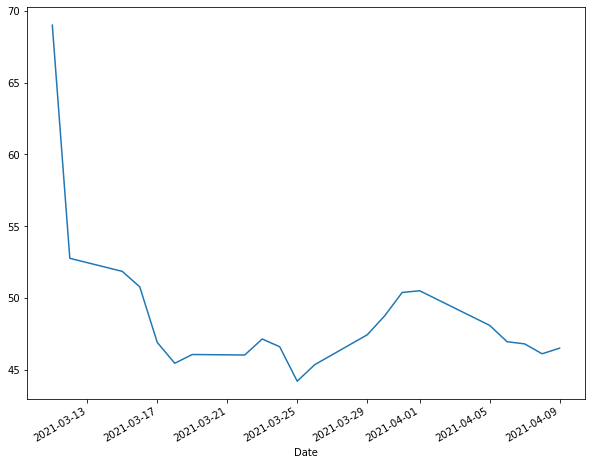

In [ ]:
coupang.High.plot(figsize=(10, 8))

In [120]:
df_volume['coupang'].plot(figsize=(10, 8))

KeyError: 'coupang'

<Axes: xlabel='Date'>

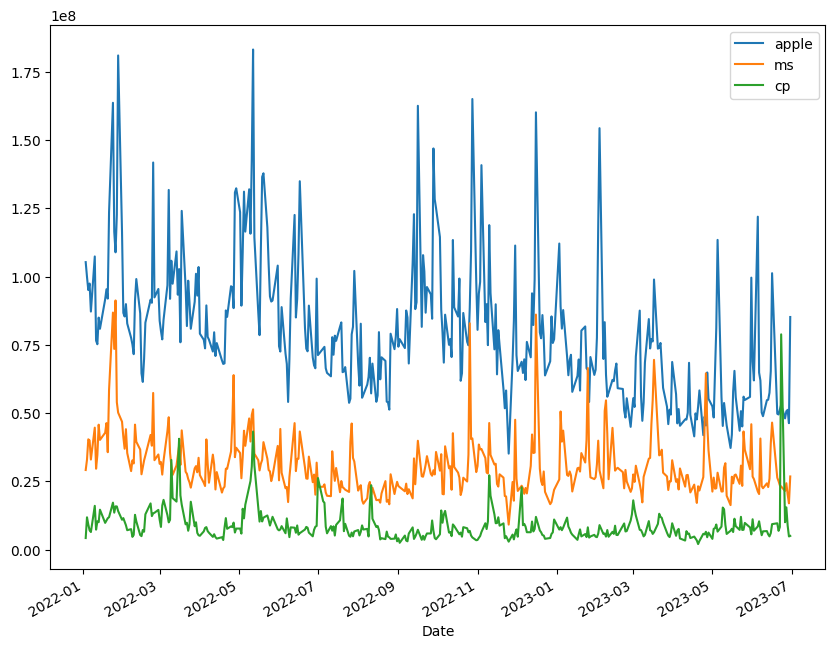

In [119]:
df_volume.plot(figsize=(10, 8))

### Moving Window Functions

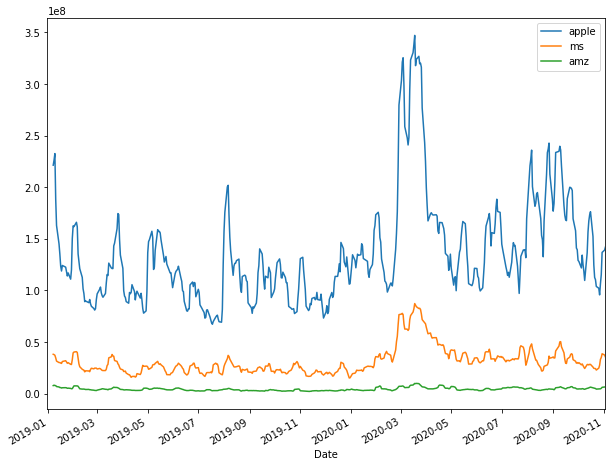

In [ ]:
df_volume.rolling(window=5).mean().plot(figsize=(10, 8))